# Nama : Vanissa Wanika Siburian
# NIM    : 09011381722094
# Kelas : SK5U

Diabetes adalah suatu kondisi yang mengakibatkan meningkatnya kadar gula di dalam darah. Selain itu, Diabetes adalah suatu kelainan reaksi kimia dalam hal pemanfaatan yang tepat atas karbohidrat, lemak, dan protein dari makanan karena tidak cukupnya pengeluaran atau kurangnya Insulin.

### 1. Import Library
ada beberapa library yang digunakan yaitu :

1. numpy = Digunakan Untuk Menginput Array
2. pandas = Fungsinya Seperti Numpy, Namun Lebih Kearah Matriks Dengan Baris Dan Kolom Yang Telah Dimuat Dalam Bentuk Tabel
3. sklearn.preprocessing = digunakan pada tahap Preprosesing untuk mengubah data menjadi format yang lebih efektif diproses dalam jaringan saraf
4. matplotlib.pyplot = Digunakan Untuk Membuat Grafik Dataset Yang Telah Valid
5. sklearn.Model_Selection = Digunakan Untuk Memilah Dataset Menjadi Data Training, Data Testing Dan Data Aslinya
6. keras.optimizers = Digunakan Untuk Mengoptimalkan Data Dengan Fungsi Adam
7. keras.Model = Digunakan Untuk Memasukkan Hidden Layers (Banyaknya Jalan Pada 1 Data Ke Data Yang Lain) Dengan Sequential
9. keras.Layers = Digunakan Untuk Banyaknya Hidden Layers Yang Digunakan Untuk 1 Data Set (Banyaknya Cara/Jalan)
10. keras.activations = Digunakan Untuk Mengubah Setiap Nilai Input Negatif Menjadi 0 Pada Grafik Sesegera 
11. seaborn = Digunakan Untuk Visualisasi Data Secara Statistik
12. imblearn.over_sampling = digunakan untuk membuat agar data yang kita miliki menjadi balance

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
import seaborn as sns
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


### 2. Dataset
Pada penelitian ini dataset diambil melalui kaggle. Dataset tersebut memiliki jumalah data sebanyak 768 dengan jumlah 8 column yaitu :
1. Pregnancies
2. Glucose(Konsentrasi glukosa plasma 2 jam dalam tes toleransi glukosa oral)
3. BloodPreassure(Tekanan darah)
4. SkinThickness (Ketebalan lipatan kulit trisep)
5. Insulin
6. BMI (Berat Badan)
7. DiabetesPedigreeFuncion
8. Age (Umur)
9. Outcome ( 0 = tidak diabetes dan 1 = diabetes )

In [2]:
dataset = pd.read_csv('diabetes.csv')

In [3]:
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Lalu untuk pengecekan data bisa menggunakan perintah "dataset.info()". Dalam perintah tersebut dapat kita lihat apakah dataset kita sudah bersih atau masih ada data yang kosong. Pada dataset yang saya gunakan untuk tiap data column sudah bersih (non-null)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Lalu kita mengecek seberapa banyak data tiap label yang kita punya.

Pada dataset ini, label yang digunakan yaitu
1. Angka 0 menandakan bahwa tidak terserang penyakit diabetes
2. Angka 1 manandakan bahwa terserang penyakit diabetes

In [5]:
dataset.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Pada dataset tersebut dapat di lihat bahwa ada sebanyak 500 data pada label 0 dan ada sebanyak 268 data pada label 1.

Untuk visualisasi grafiknya bisa kita gunakan perintah "sns.countplot()" seperti dibawah ini.

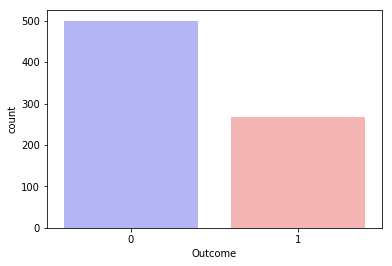

In [6]:
sns.countplot(x="Outcome", data=dataset, palette="bwr")
plt.show()

### 3. Menetukan Data (X) dan Target (Y)

Untuk data (X) diambil dari column 1-7 sedangkan untuk target (Y) digunakan column 8

In [7]:
X = dataset.iloc[:, 0:8]
Y = dataset.iloc [:, 8]

### 4. Menyeimbangkan Data

Dikerenakan dataset yang kurang balance, maka dilakukankanlah perseimbangan data dengan menggunakan SMOTE. SMOTE (synthetic minority oversampling technique) adalah salah satu metode oversampling yang paling umum digunakan untuk menyelesaikan masalah ketidakseimbangan. Yang dilakukannya adalah menciptakan sampel sintetis (bukan duplikat) dari kelas minoritas. Karenanya menjadikan kelas minoritas sama dengan kelas mayoritas. SMOTE melakukan ini dengan memilih catatan yang sama dan mengubah catatan itu satu kolom pada satu waktu dengan jumlah acak dalam perbedaan dengan catatan tetangga.

In [8]:
X_smote, Y_smote = SMOTE().fit_sample(X,Y)
X = pd.DataFrame(X_smote)
Y = pd.DataFrame(Y_smote)

### 5. Preprocessing

Pada preprocessing ini digunakan MinMaxScaler. Min-Max Scaling bekerja dengan scaling data/menyesuaikan data dalam rentang/range tertentu (range nilai minimum hingga nilai maksimum), dengan rentang yang biasa digunakan adalah 0 hingga 1. 

In [9]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### 6. Splitting dan Modeling

Pada tahap ini kita membuat file test berukuran 20% dari jumlah keseluruhan data yang tersedia secara acak.

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, shuffle=True, stratify=Y)

Setelah itu kita membuat model NN dengan 
1. Hiden layer pertama sebesar 100 dengan input dim sebanyak 8 
2. Hiden layer kedua sebesar 50 dengan aktivasi relu
3. Hiden layer ketiga sebesar 50 dengan aktivasi relu
4. Droput digunakan untuk mensimulasikan sejumlah besar arsitektur jaringan yang berbeda dengan menurunkan node secara acak selama data di training sebesar 50%.
5. Hiden layer keempat sebesar 25 dengan aktivasi relu
6. Selain itu kita membuat output layer 1 (iya atau tidak) dengan aktivasi sigmoid. 

In [11]:
model = Sequential()
model.add(Dense(units= 100, input_dim = 8, activation=relu))
model.add(Dense(units= 50, activation=relu))
model.add(Dense(units= 50, activation=relu))
model.add(Dropout(0.5))
model.add(Dense(units= 25, activation=relu))
model.add(Dense(units= 1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.save('model.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Setalah itu kita lakukan fit model. Pada tahap ini dilakukan proses untuk mendapatkan akurasi dan loss dari dataset.

In [12]:
acc_training = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, epochs=300)


Train on 800 samples, validate on 200 samples
Epoch 1/300
800/800 [==============================] - 1s 1ms/step - loss: 0.6879 - accuracy: 0.5150 - val_loss: 0.6791 - val_accuracy: 0.5650
Epoch 2/300
800/800 [==============================] - 0s 208us/step - loss: 0.6738 - accuracy: 0.6413 - val_loss: 0.6445 - val_accuracy: 0.7000
Epoch 3/300
800/800 [==============================] - 0s 140us/step - loss: 0.6397 - accuracy: 0.6750 - val_loss: 0.5972 - val_accuracy: 0.7250
Epoch 4/300
800/800 [==============================] - 0s 130us/step - loss: 0.6131 - accuracy: 0.6850 - val_loss: 0.5515 - val_accuracy: 0.7550
Epoch 5/300
800/800 [==============================] - 0s 130us/step - loss: 0.5684 - accuracy: 0.7312 - val_loss: 0.5040 - val_accuracy: 0.8000
Epoch 6/300
800/800 [==============================] - 0s 134us/step - loss: 0.5702 - accuracy: 0.7013 - val_loss: 0.5190 - val_accuracy: 0.7300
Epoch 7/300
800/800 [==============================] - 0s 125us/step - loss: 0.5393 -

Epoch 111/300
800/800 [==============================] - 0s 118us/step - loss: 0.3182 - accuracy: 0.8575 - val_loss: 0.4111 - val_accuracy: 0.8200
Epoch 112/300
800/800 [==============================] - 0s 95us/step - loss: 0.3091 - accuracy: 0.8712 - val_loss: 0.4216 - val_accuracy: 0.8250
Epoch 113/300
800/800 [==============================] - 0s 105us/step - loss: 0.2928 - accuracy: 0.8712 - val_loss: 0.4089 - val_accuracy: 0.8100
Epoch 114/300
800/800 [==============================] - 0s 106us/step - loss: 0.2797 - accuracy: 0.8888 - val_loss: 0.4100 - val_accuracy: 0.8550
Epoch 115/300
800/800 [==============================] - 0s 101us/step - loss: 0.2798 - accuracy: 0.8838 - val_loss: 0.4177 - val_accuracy: 0.8250
Epoch 116/300
800/800 [==============================] - 0s 103us/step - loss: 0.2811 - accuracy: 0.8825 - val_loss: 0.4023 - val_accuracy: 0.8200
Epoch 117/300
800/800 [==============================] - 0s 154us/step - loss: 0.2704 - accuracy: 0.8813 - val_loss: 0.

Epoch 167/300
800/800 [==============================] - 0s 107us/step - loss: 0.1782 - accuracy: 0.9287 - val_loss: 0.5559 - val_accuracy: 0.8450
Epoch 168/300
800/800 [==============================] - 0s 96us/step - loss: 0.1824 - accuracy: 0.9262 - val_loss: 0.6533 - val_accuracy: 0.8000
Epoch 169/300
800/800 [==============================] - 0s 103us/step - loss: 0.1769 - accuracy: 0.9362 - val_loss: 0.6189 - val_accuracy: 0.8250
Epoch 170/300
800/800 [==============================] - 0s 90us/step - loss: 0.1991 - accuracy: 0.9250 - val_loss: 0.6123 - val_accuracy: 0.8250
Epoch 171/300
800/800 [==============================] - 0s 120us/step - loss: 0.2199 - accuracy: 0.9075 - val_loss: 0.6846 - val_accuracy: 0.7750
Epoch 172/300
800/800 [==============================] - 0s 91us/step - loss: 0.2444 - accuracy: 0.8888 - val_loss: 0.5889 - val_accuracy: 0.8250
Epoch 173/300
800/800 [==============================] - 0s 126us/step - loss: 0.1734 - accuracy: 0.9388 - val_loss: 0.58

Epoch 223/300
800/800 [==============================] - 0s 111us/step - loss: 0.0946 - accuracy: 0.9675 - val_loss: 0.8295 - val_accuracy: 0.8350
Epoch 224/300
800/800 [==============================] - 0s 97us/step - loss: 0.1142 - accuracy: 0.9525 - val_loss: 0.8671 - val_accuracy: 0.8400
Epoch 225/300
800/800 [==============================] - 0s 113us/step - loss: 0.1385 - accuracy: 0.9400 - val_loss: 0.8293 - val_accuracy: 0.8100
Epoch 226/300
800/800 [==============================] - 0s 119us/step - loss: 0.1506 - accuracy: 0.9375 - val_loss: 0.7740 - val_accuracy: 0.8200
Epoch 227/300
800/800 [==============================] - 0s 106us/step - loss: 0.1553 - accuracy: 0.9400 - val_loss: 0.7597 - val_accuracy: 0.8350
Epoch 228/300
800/800 [==============================] - 0s 114us/step - loss: 0.1464 - accuracy: 0.9463 - val_loss: 0.7451 - val_accuracy: 0.8500
Epoch 229/300
800/800 [==============================] - 0s 98us/step - loss: 0.1168 - accuracy: 0.9513 - val_loss: 0.8

Setelah data di training, lalu data dapat dievaluasi melalui proses evaluasi model dan hasil dari akurasi akan dapat ditampilkan. Pada tahap ini akurasi yang saya dapatkan adalah sebesar 85%.

In [13]:
acc_testing  = model.evaluate(X_test, Y_test) 
print('akurasinya adalah {}'.format(acc_testing[1]))

200/200 [==============================] - 0s 85us/step
akurasinya adalah 0.8500000238418579


### 7. Visualisasi

Selain dapat melihat akurasi, kita juga dapat melihat visualisasi dari data yang sudah di trainning tadi.

Pada grafik pertama menamplikan grafik dari akurasi dan pada grafik kedua menampilkan grafik loss.

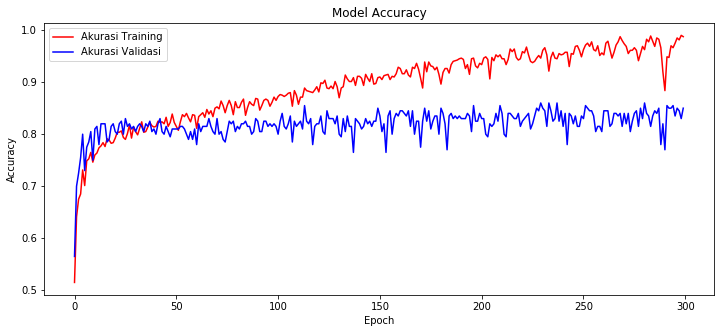

In [14]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(acc_training.history['accuracy'],'red', label='Akurasi Training')
ax0.plot(acc_training.history['val_accuracy'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()

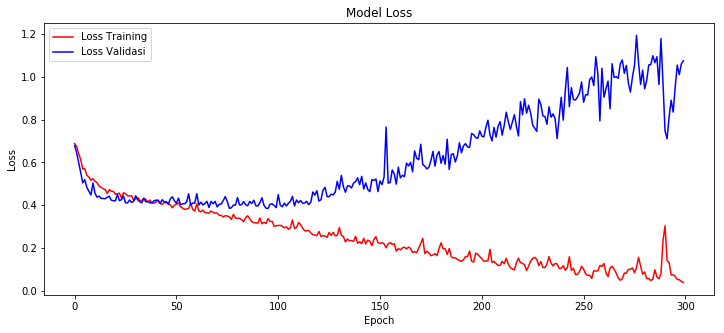

In [15]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(acc_training.history['loss'],'red', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()

### 8. Confusion Matrix

Confusion matrix merupakan salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi.Pada pengukuran kinerja menggunakan confusion matrix, terdapat 4 (empat) istilah sebagai representasi hasil proses klasifikasi yaitu :
1. TP adalah True Positive, yaitu jumlah data positif yang terklasifikasi dengan benar oleh sistem.
2. TN adalah True Negative, yaitu jumlah data negatif yang terklasifikasi dengan benar oleh sistem.
3. FN adalah False Negative, yaitu jumlah data negatif namun terklasifikasi salah oleh sistem.
4. FP adalah False Positive, yaitu jumlah data positif namun terklasifikasi salah oleh sistem

|-|No default(0)|default(1)|
|---|---|---|
|No default(0)|TN|FP|
|default(1)|FN|TP|

Berdasarkan nilai True Negative (TN), False Positive (FP), False Negative (FN), dan True Positive (TP) dapat diperoleh nilai Accuracy, Specificity, Sensitivity, Precision, dan F1 Score. Untuk memperoleh nilai akurasi, presisi dan recall kita dapat menggunakan rumus :

$$Accuracy = \frac {tp+tn}{tp+tn+fp+fn}$$

$$Specificity = \frac {tn}{tn+fp}$$

$$Sensitivity = \frac {tp}{tp+fn}$$

$$Precision = \frac {tp}{tp+fp}$$

$$F1 Score = \frac {2 \times Sensitivity \times Precision}{Sensitivity+ Precision}$$

Untuk dapat menghitung Confusion Matrix pada dataset yang telah diolah, kita deklarasikan model predict dari data training dan data testing

In [16]:
training_predicted = model.predict(X_train)
testing_predicted = model.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix

training_cm = confusion_matrix(Y_train,training_predicted.round())
testing_cm = confusion_matrix(Y_test,testing_predicted.round())

Berikut hasil Confusion Matrix dari data training

In [18]:
training_cm

array([[400,   0],
       [  5, 395]], dtype=int64)

Berikut adalah hasil perolehan nilai Accuracy, Specificity, Sensitivity, Precision, dan F1 Score pada data training

In [19]:
#training
tp = training_cm[0][0]
fn = training_cm[0][1]
fp = training_cm[1][0]
tn = training_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy training {0}".format(accuracy))
print("Specificity training {0}".format(specificity))
print("Sensitivity training {0}".format(sensitivity))
print("Precision training {0}".format(precision))
print("F1 Score training {0}".format(f1_score))

Accuracy training 0.99375
Specificity training 0.9875
Sensitivity training 1.0
Precision training 0.9876543209876543
F1 Score training 0.9937888198757764


Berikut hasil Confusion Matrix dari data testing

In [20]:
print(testing_cm)

[[84 16]
 [14 86]]


Berikut adalah hasil perolehan nilai Accuracy, Specificity, Sensitivity, Precision, dan F1 Score pada data testing

In [21]:
tp = testing_cm[0][0]
fn = testing_cm[0][1]
fp = testing_cm[1][0]
tn = testing_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy testing {0}".format(accuracy))
print("Specificity testing {0}".format(specificity))
print("Sensitivity testing {0}".format(sensitivity))
print("Precision testing {0}".format(precision))
print("F1 Score testing {0}".format(f1_score))

Accuracy testing 0.85
Specificity testing 0.86
Sensitivity testing 0.84
Precision testing 0.8571428571428571
F1 Score testing 0.8484848484848485


### 9. Kesimpulan

Dari hasil percobaan diatas dapat disimpulkan bahwa dataset Pima Indians yang memiliki jumlah data sebanyak 768 mendapatkan akurasi sebesa 85% dengan menggunakan Artificial Neural Network.

### 10. Referensi

1. Paper : OPTIMASI JARINGAN SARAF TIRUAN UNTUK DIAGNOSIS PENYAKIT DIABETES INDIAN PIMA https://journal.unipdu.ac.id/index.php/teknologi/article/view/560
2. Dataset https://www.kaggle.com/uciml/pima-indians-diabetes-database